In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

In [2]:
img = np.load("celeb_transformed/Angelina Jolie/001_fe3347c0.npy")

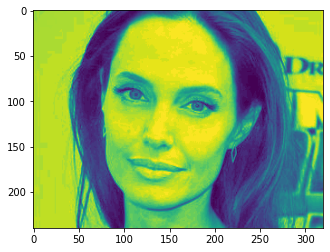

In [3]:
norm_img = img/np.max(img)
plt.imshow(norm_img.T)

In [4]:
celebs_path = Path("celeb_transformed")
labels = [celeb.name for celeb in celebs_path.iterdir()]

In [5]:
le = LabelEncoder()
le.fit(labels)
print(le.classes_)
le.transform(labels)

['Angelina Jolie' 'Brad Pitt' 'Denzel Washington' 'Hugh Jackman'
 'Jennifer Lawrence' 'Johnny Depp' 'Kate Winslet' 'Leonardo DiCaprio'
 'Megan Fox' 'Natalie Portman' 'Nicole Kidman' 'Robert Downey Jr'
 'Sandra Bullock' 'Scarlett Johansson' 'Tom Cruise' 'Tom Hanks'
 'Will Smith']


array([15, 10,  5,  7, 11,  1,  6,  3, 16,  8, 14,  9,  4, 13,  2, 12,  0])

In [6]:
labels = []
data = []
for celeb in celebs_path.iterdir():
    for file in celeb.iterdir():
        img = np.load(file)
        data.append(img)
        labels.append(le.transform([celeb.name])[0])

labels = np.array(labels)
data = np.array(data)
    

In [7]:
print(labels.shape)
print(data.shape)

(1642,)
(1642, 320, 240)


In [8]:
from collections import Counter
print(Counter(labels))

Counter({13: 184, 7: 97, 3: 96, 4: 96, 11: 95, 9: 95, 2: 94, 10: 92, 8: 92, 6: 91, 15: 90, 14: 89, 12: 89, 0: 89, 5: 86, 1: 84, 16: 83})


In [9]:
train_data, validation_data, train_labels, validation_labels= model_selection.train_test_split(data,labels, random_state=42,test_size=0.2)

print('train data shape:',np.shape(train_data))
print('validation data shape:',np.shape(validation_data))
print('train labels shape:',np.shape(train_labels))
print('validation labels shape:',np.shape(validation_labels))

train data shape: (1313, 320, 240)
validation data shape: (329, 320, 240)
train labels shape: (1313,)
validation labels shape: (329,)


In [10]:
mean = np.mean(train_data, axis = 0)
std = np.std(train_data, axis = 0)

train_data = (train_data-mean) / std
validation_data = (validation_data-mean) / std

In [11]:
train_data = train_data[:,:,:,np.newaxis]
train_data[0].shape

(320, 240, 1)

In [12]:
classes = len(le.classes_)
classes

17

In [17]:
import gc
gc.collect()

1238

In [18]:
train_data.shape

(1313, 320, 240, 1)

In [19]:
model = keras.models.Sequential([
    #keras.layers.Input(shape=train_data[0].shape),
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=train_data.shape[1:]),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    #keras.layers.Dense(10, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(classes, activation="softmax")
    ])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

#callback = keras.callbacks.EarlyStopping(monitor="loss", verbose=1, patience=10, min_delta=0.0001, mode="auto")
history = model.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), batch_size=2, epochs=100)#, callbacks=[callback])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 318, 238, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 159, 119, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 157, 117, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 78, 58, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 76, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 38, 28, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 34048)            

2022-11-27 22:47:16.311613: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 403353600 exceeds 10% of free system memory.
2022-11-27 22:47:26.876413: W tensorflow/core/common_runtime/bfc_allocator.cc:457] Allocator (GPU_0_bfc) ran out of memory trying to allocate 384.67MiB (rounded to 403353600)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-11-27 22:47:26.876444: I tensorflow/core/common_runtime/bfc_allocator.cc:1004] BFCAllocator dump for GPU_0_bfc
2022-11-27 22:47:26.876453: I tensorflow/core/common_runtime/bfc_allocator.cc:1011] Bin (256): 	Total Chunks: 21, Chunks in use: 21. 5.2KiB allocated for chunks. 5.2KiB in use in bin. 964B client-requested in use in bin.
2022-11-27 22:47:26.876458: I tensorflow/core/common_runtime/bfc_allocator.cc:1011] Bin (512): 	Total Chunks: 1, C

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.